<a href="https://colab.research.google.com/github/MirzaUmar1/SIC-Artificial-Intelligence/blob/main/Classwork/SICClassTask27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Load digits dataset

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()

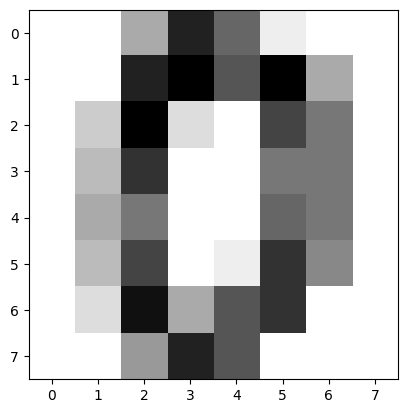

In [13]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

display first 10 images

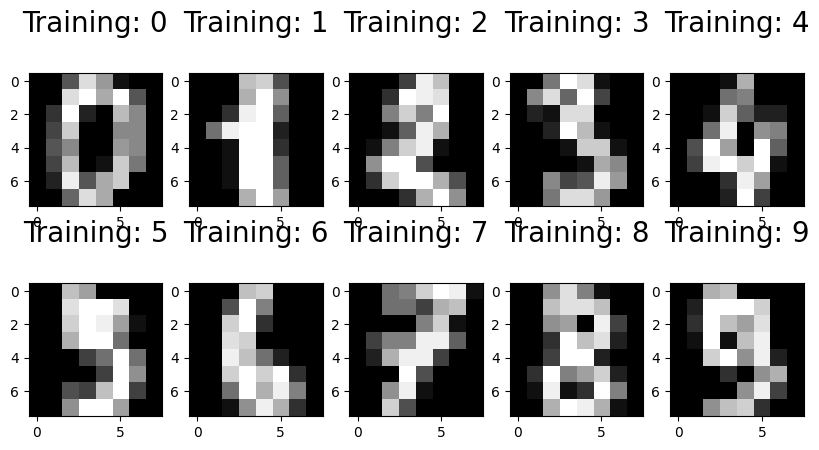

In [23]:
plt.figure(figsize=(10, 5))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)
plt.show()

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit_transform(digits.data)

array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -0.71329407,
         -0.33931521,   0.04309941],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   0.34014615,
          0.18755292,   0.03618482],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   0.88794293,
          0.27870474,  -0.09016459],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -0.38096517,
          0.4478301 ,   0.11669598],
       [ -4.87210009, -12.42395362,  10.17086635, ...,  -0.64909048,
          0.7614621 ,   0.40314852],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,   1.0789026 ,
         -1.29974951,  -0.35114147]])

Reconstruct the images from the reduced components and calculate the
reduction in size.

In [49]:
reconstructed_images = pca.inverse_transform(pca.fit_transform(digits.data))

original_size = digits.data.shape[1]
reduced_size = pca.transform(digits.data).shape[1]
reduction_ratio = 1 - reduced_size / original_size

print(f"Original size: {original_size}")
print(f"Reduced size: {reduced_size}")
print(f"Reduction ratio: {reduction_ratio:.2f}")

Original size: 64
Reduced size: 50
Reduction ratio: 0.22


visualize original and reconstructed images

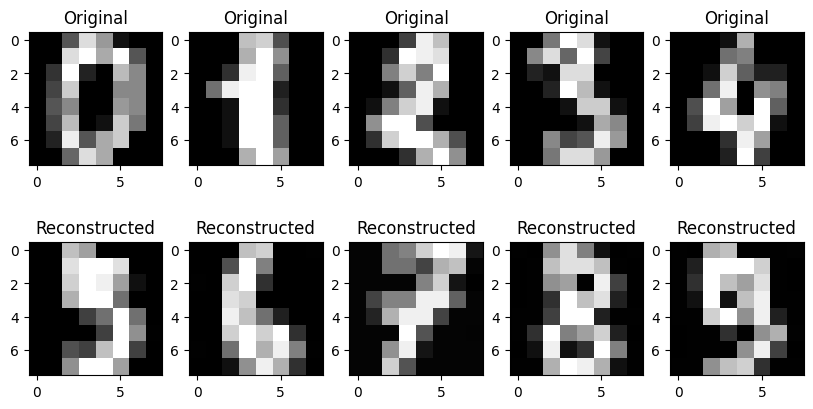

In [50]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.reshape(digits.data[i], (8, 8)), cmap=plt.cm.gray)
    plt.title('Original')

    plt.subplot(2, 5, (i % 5) + 6)
    plt.imshow(np.reshape(reconstructed_images[i], (8, 8)), cmap=plt.cm.gray)
    plt.title('Reconstructed')
plt.show()

#**Wine Dataset**

Load wine dataset

In [51]:
from sklearn.datasets import load_wine
wine = load_wine()

Apply K-Means clustering on the original high-dimensional data. Perform data
normalization before applying K-Means.

In [52]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine.data)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=3, random_state=42)

Calculate the time for K-Means.

In [53]:

import time

start_time = time.time()
kmeans.fit(scaled_data)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for K-Means: {elapsed_time:.2f} seconds")

Time taken for K-Means: 0.01 seconds


Visualize the clustering results in the original space (2 features only for plot)

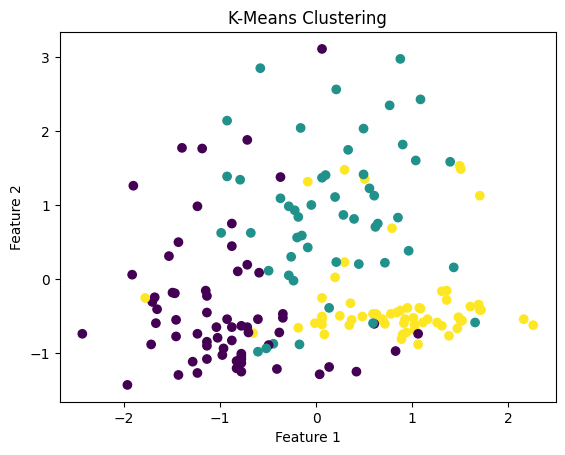

In [54]:

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

Now apply PCA to reduce to 2 components.

In [55]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

Apply K-Means clustering on the PCA-reduced data and find time for K-Means
again.

In [56]:

kmeans_pca = KMeans(n_clusters=3, random_state=42)
start_time_pca = time.time()
kmeans_pca.fit(pca_data)
end_time_pca = time.time()
elapsed_time_pca = end_time_pca - start_time_pca
print(f"Elapsed time with PCA: {elapsed_time_pca} seconds")

Elapsed time with PCA: 0.010442018508911133 seconds


Visualize the clustering results on PCA-reduced data.

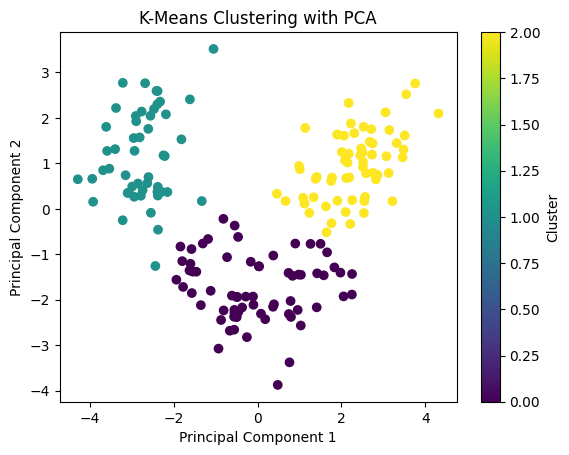

In [57]:

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()